In [2]:
import pandas as pd

df = pd.read_csv("../Lab1/after_lab1.csv")
df = df.drop(["Name", "Ticket"], axis = "columns")
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
0,1,0,1.0,22.0,0.125,0.0,0.014151,True,True,False,False,False,False,False,False,False,True
1,2,1,0.0,38.0,0.125,0.0,0.139136,False,False,True,False,False,False,False,False,False,False
2,3,1,1.0,26.0,0.000,0.0,0.015469,False,True,False,False,False,False,False,False,False,True
3,4,1,0.0,35.0,0.125,0.0,0.103644,False,False,True,False,False,False,False,False,False,True
4,5,0,1.0,35.0,0.000,0.0,0.015713,True,True,False,False,False,False,False,False,False,True


In [ ]:
X_class= df.drop(["Survived"], axis = "columns")
y_class = df["Survived"]

In [33]:
#Решить задачу классификации методом случайного леса. Оценить работу модели через OOB данные
from sklearn.ensemble import RandomForestClassifier

class_RandFor_1 = RandomForestClassifier(max_depth = 4, random_state = 5, bootstrap = True, oob_score = True, max_features = "sqrt")
class_RandFor_1.fit(X_class, y_class)
print(f"Accuracy Random Forest OOB = {class_RandFor_1.oob_score_}")

Accuracy Random Forest OOB = 0.8159371492704826


Accuracy Random Forest TEST = 0.8179271708683473
AUC Random Forest = 0.8694936119244078


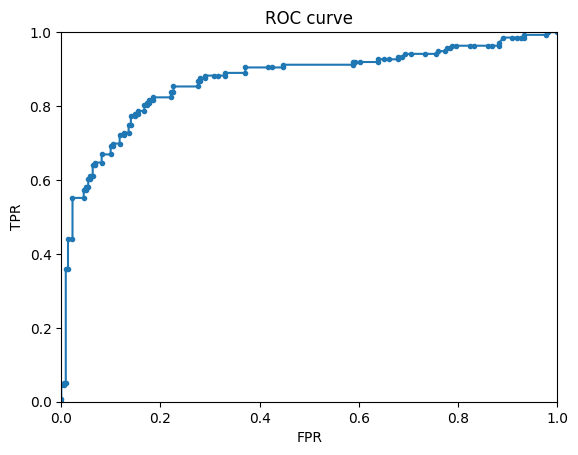

In [37]:
# Чтобы построить ROC-кривую пришлось разделять выборки
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from matplotlib import pyplot as plt


X_train_RandFor_2, X_test_RandFor_2, y_train_RandFor_2, y_test_RandFor_2 = train_test_split(X_class, y_class, test_size=0.4, random_state=13)
class_RandFor_2 = RandomForestClassifier(max_depth=4, random_state=5, bootstrap=True, oob_score=False)

class_RandFor_2.fit(X_train_RandFor_2, y_train_RandFor_2)

y_pred_RandFor_2 = class_RandFor_2.predict(X_test_RandFor_2)
y_pred_proba_RandFor_2 = class_RandFor_2.predict_proba(X_test_RandFor_2)


fpr_RandFor_2, tpr_RandFor_2, thresholds_RandFor_2 = roc_curve(y_test_RandFor_2, y_pred_proba_RandFor_2[:,1])
    
plt.plot(fpr_RandFor_2, tpr_RandFor_2, marker='.')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')

auc_metric_RandFor_2 = auc(fpr_RandFor_2, tpr_RandFor_2)
print(f"Accuracy Random Forest TEST = {accuracy_score(y_test_RandFor_2, y_pred_RandFor_2)}")
print(f"AUC Random Forest = {auc_metric_RandFor_2}")

Accuracy ADA = 0.7983193277310925
AUC ADA = 0.8478873239436621


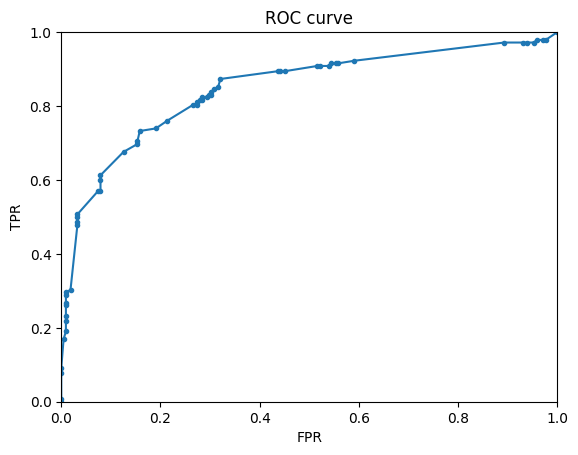

In [54]:
# Решить задачу классификации методом AdaBoost и методом градиентного бустинга.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from matplotlib import pyplot as plt

X_train_Ada, X_test_Ada, y_train_Ada, y_test_Ada = train_test_split(X_class, y_class, test_size=0.4, random_state=3)

class_Ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=44)
class_Ada.fit(X_train_Ada, y_train_Ada)

y_pred_Ada = class_Ada.predict(X_test_Ada)
y_pred_proba_Ada = class_Ada.predict_proba(X_test_Ada)

fpr_Ada, tpr_Ada, thresholds_Ada = roc_curve(y_test_Ada, y_pred_proba_Ada[:,1])
    
plt.plot(fpr_Ada, tpr_Ada, marker='.')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')

auc_metric_Ada = auc(fpr_Ada, tpr_Ada)

print(f"Accuracy ADA = {accuracy_score(y_test_Ada, y_pred_Ada)}")
print(f"AUC ADA = {auc_metric_Ada}")

Accuracy GRAD = 0.8263305322128851
AUC GRAD = 0.8410246971420923


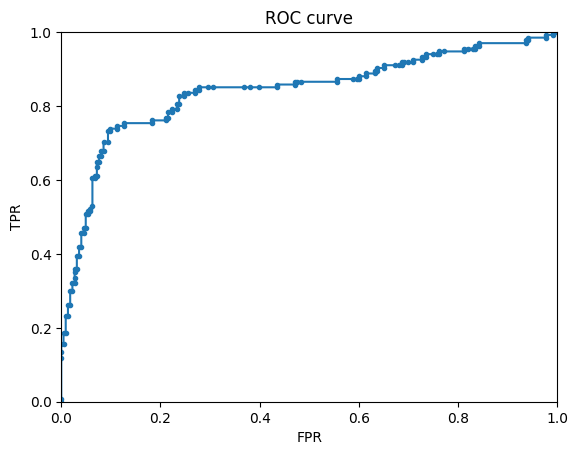

In [68]:
# Решить задачу классификации методом AdaBoost и методом градиентного бустинга.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from matplotlib import pyplot as plt

X_train_Grad, X_test_Grad, y_train_Grad, y_test_Grad = train_test_split(X_class, y_class, test_size=0.4, random_state=73)

class_Grad = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=2)
class_Grad.fit(X_train_Grad, y_train_Grad)

y_pred_Grad = class_Grad.predict(X_test_Grad)
y_pred_proba_Grad = class_Grad.predict_proba(X_test_Grad)

fpr_Grad, tpr_Grad, thresholds_Grad = roc_curve(y_test_Grad, y_pred_proba_Grad[:,1])
    
plt.plot(fpr_Grad, tpr_Grad, marker='.')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')

auc_metric_Grad = auc(fpr_Grad, tpr_Grad)

print(f"Accuracy GRAD = {accuracy_score(y_test_Grad, y_pred_Grad)}")
print(f"AUC GRAD = {auc_metric_Grad}")